In [1]:
import pandas as pd
import sklearn.metrics

In [2]:
df = pd.read_csv("Fraud_Data.csv")

In [3]:
df.head(20)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class
0,22058,2/24/15 22:55,4/18/15 2:47,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,0
1,333320,6/7/15 20:39,6/8/15 1:38,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,0
2,1359,1/1/15 18:52,1/1/15 18:52,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,1
3,150084,4/28/15 21:13,5/4/15 13:54,44,ATGTXKYKUDUQN,SEO,Safari,M,41,0
4,221365,7/21/15 7:09,9/9/15 18:40,39,NAUITBZFJKHWW,Ads,Safari,M,45,0
5,159135,5/21/15 6:03,7/9/15 8:05,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,0
6,50116,8/1/15 22:40,8/27/15 3:37,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,0
7,360585,4/6/15 7:35,5/25/15 17:21,27,HPUCUYLMJBYFW,Ads,Opera,M,34,0
8,159045,4/21/15 23:38,6/2/15 14:01,30,ILXYDOZIHOOHT,SEO,IE,F,43,0
9,182338,1/25/15 17:49,3/23/15 23:05,62,NRFFPPHZYFUVC,Ads,IE,M,31,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 10 columns):
user_id           151112 non-null int64
signup_time       151112 non-null object
purchase_time     151112 non-null object
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
class             151112 non-null int64
dtypes: int64(4), object(6)
memory usage: 11.5+ MB


In [5]:
df.isna().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
class             0
dtype: int64

In [29]:
df.describe()

,purchase_value,age,class,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
count,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000
mean,36.935372,33.140704,0.093646,0.396269,0.202605,0.401126,0.406533,0.162859,0.243045,0.024326,0.163237,0.415712,0.584288
std,18.322762,8.617733,0.291336,0.489123,0.401942,0.490128,0.491188,0.369239,0.428923,0.154061,0.369583,0.492846,0.492846
min,9.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,39.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,154.000000,76.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
import matplotlib as plt
import seaborn as sns

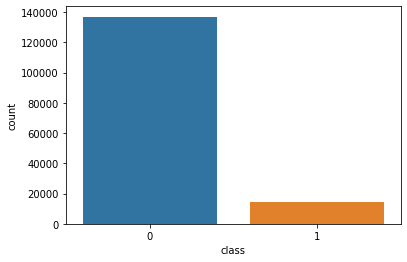

In [22]:
#sns.countplot(x = df['class'])

sns.countplot(x = 'class', data = df)

In [6]:
rm = ['user_id',
'signup_time',
'purchase_time',
'device_id']

df = df.drop(columns = rm)

df.head()

,purchase_value,source,browser,sex,age,class
0,34,SEO,Chrome,M,39,0
1,16,Ads,Chrome,F,53,0
2,15,SEO,Opera,M,53,1
3,44,SEO,Safari,M,41,0
4,39,Ads,Safari,M,45,0


In [7]:
df = pd.get_dummies(df)
df.shape

(151112, 13)

In [8]:
df.head()

,purchase_value,age,class,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
0,34,39,0,0,0,1,1,0,0,0,0,0,1
1,16,53,0,1,0,0,1,0,0,0,0,1,0
2,15,53,1,0,0,1,0,0,0,1,0,0,1
3,44,41,0,0,0,1,0,0,0,0,1,0,1
4,39,45,0,1,0,0,0,0,0,0,1,0,1


In [9]:
x = df.drop(columns = 'class')

In [10]:
y = df['class']

In [23]:
from sklearn.model_selection import train_test_split

x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.3)

print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(105778, 12)
(45334, 12)
(105778,)
(45334,)


In [24]:
from sklearn import svm

In [25]:
#s = svm.sgd()
#s = s.fit(x_tr,y_tr)

In [ ]:
#s

In [ ]:
#pred = s.predict(x_te)

In [ ]:
#acc = accuracy_score(y_te,pred)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
def train_model(classifier,x_tr,y_tr,x_te,y_te):
    mod = classifier.fit(x_tr,y_tr)
    pred=mod.predict(x_te)
    accuracy = accuracy_score(y_te,pred)
    return accuracy

In [28]:
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

acc = train_model(naive_bayes.MultinomialNB(),x_tr,y_tr,x_te,y_te)

print(acc)

0.9059205011691005
